In [45]:
system("unzip Baltimore_Streets.zip")
system("unzip Baltimore_FastFood.zip")
system("unzip Baltimore_Junctions.zip")


In [61]:
library(spdep)
library(classInt)
library(rgdal)
library(RColorBrewer)
library(spatstat)
library(maptools)

In [41]:
ff=readOGR( dsn= getwd() , layer="Baltimore_FastFood")
streets=readOGR( dsn= getwd() , layer="Baltimore_Streets")

OGR data source with driver: ESRI Shapefile 
Source: "/home/jovyan/geog187-notebooks/Untitled Folder", layer: "Baltimore_FastFood"
with 181 features
It has 11 fields
Integer64 fields read as strings:  OBJECTID Zip OBJECTID_1 
OGR data source with driver: ESRI Shapefile 
Source: "/home/jovyan/geog187-notebooks/Untitled Folder", layer: "Baltimore_Streets"
with 47460 features
It has 38 fields
Integer64 fields read as strings:  OBJECTID_1 OBJECTID_2 FRADDL TOADDL FRADDR TOADDR FRADDLA TOADDLA FRADDRA TOADDRA BLOCK_NUM 


In [46]:
junctions=readOGR( dsn= getwd() , layer="Baltimore_Junctions")


OGR data source with driver: ESRI Shapefile 
Source: "/home/jovyan/geog187-notebooks/Untitled Folder", layer: "Baltimore_Junctions"
with 31723 features
It has 1 fields
Integer64 fields read as strings:  OBJECTID 


In [39]:
par(mar=c(0,0,0,0))

Warning message in title(...):
“"fill" is not a graphical parameter”Warning message in title(...):
“"border" is not a graphical parameter”

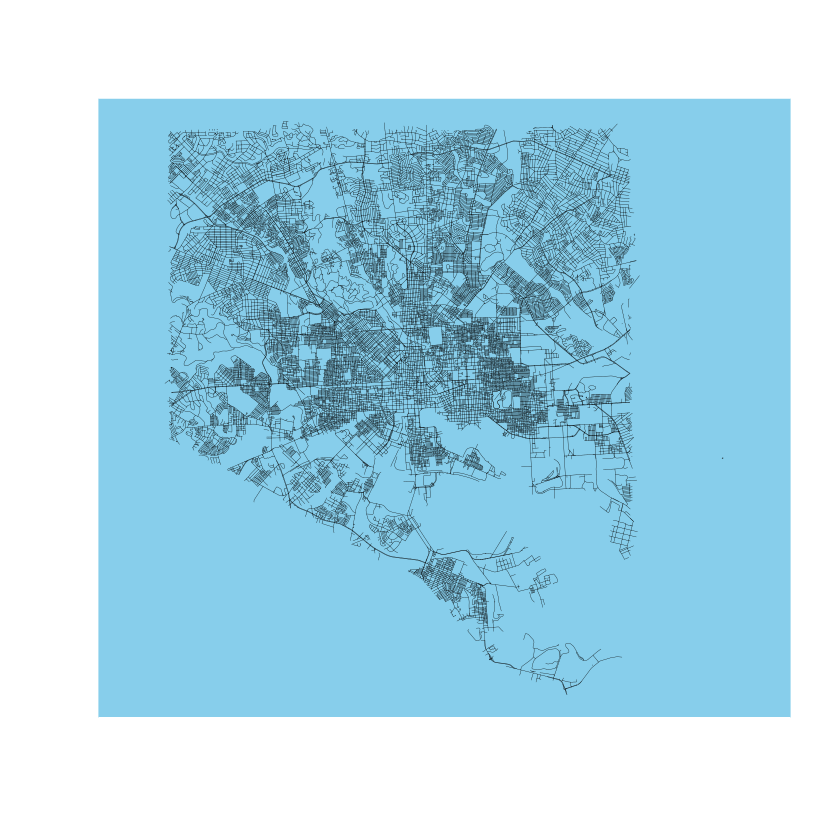

In [42]:
plot(streets, fill=TRUE, bg="skyblue", lwd=0.25, mar=rep(0,4), border=0 )

Warning message in title(...):
“"fill" is not a graphical parameter”Warning message in title(...):
“"border" is not a graphical parameter”

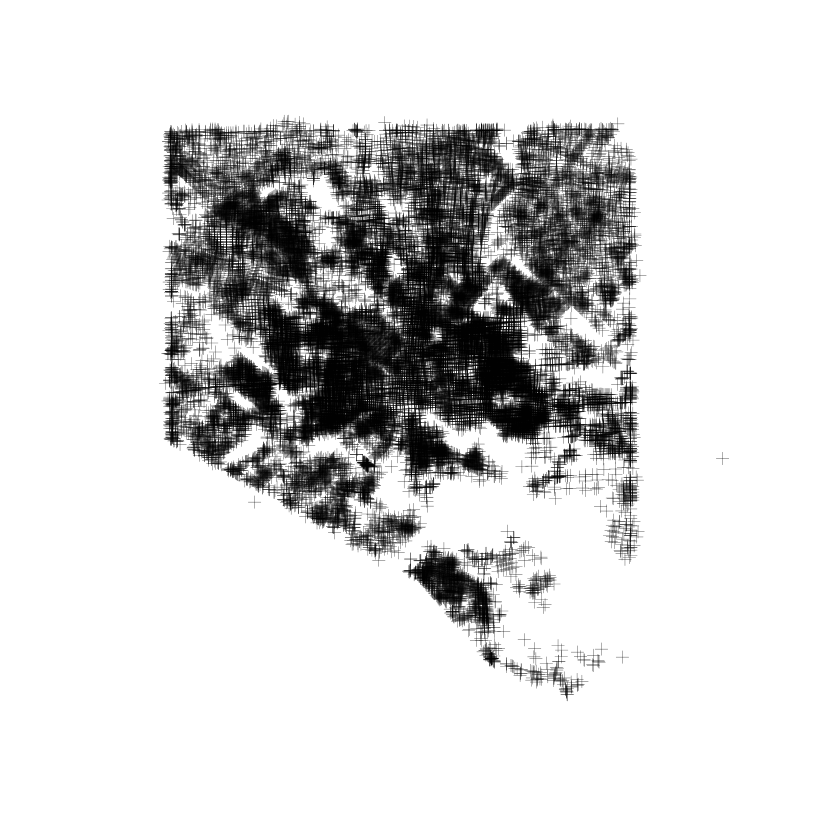

In [47]:
plot(junctions, fill=TRUE, bg="skyblue", lwd=0.25, mar=rep(0,4), border=0 )

In [52]:
summary(streets)

Object of class SpatialLinesDataFrame
Coordinates:
        min       max
x 1393352.4 1455893.1
y  558087.1  622329.7
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=38.3 +lat_2=39.45 +lat_0=37.66666666666666 +lon_0=-77
+x_0=399999.9998983998 +y_0=0 +datum=NAD83 +units=us-ft +no_defs
+ellps=GRS80 +towgs84=0,0,0]
Data attributes:
   OBJECTID_1      OBJECTID_2    OBJECTID                  TAG       
 1      :    1   1      :    1   NA's:47460   930000000000001:    2  
 10     :    1   10     :    1                930000000000347:    2  
 100    :    1   100    :    1                930000000000350:    2  
 1000   :    1   1000   :    1                930000000000354:    2  
 10000  :    1   10000  :    1                930000000000358:    2  
 10001  :    1   10001  :    1                930000000000370:    2  
 (Other):47454   (Other):47454                (Other)        :47448  
 LAST_ORG    CAPTURE_ME           LAST_USER    
 120: 2738   BLK : 3634   EIS          : 1797  
 150:39890

In [44]:
head(streets@data, n=10)

,OBJECTID_1,OBJECTID_2,OBJECTID,TAG,LAST_ORG,CAPTURE_ME,LAST_USER,EDIT_DATE,TYPE,SUBTYPE,⋯,SHAPE_Leng,PLACE,BLOCKTEXT,BLOCK_NUM,ZIPCODE,GlobalID,URL,ShapeSTLen,Shape_Le_1,FEET
0,1,1,NA,930000000034699,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRALY,⋯,NA,NA,300 BLK CALHOUN-CAREY,300,NA,{A14F63A9-6599-489F-BB07-253D6AB63E3F},NA,60.31327,60.31327,60.3133
1,2,2,NA,930000000034543,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,500 BLK MILLINGTON AVE,500,NA,{45BE0C7D-F947-4760-90F8-1C8714E501C3},NA,107.83382,107.83382,107.8340
2,3,3,NA,930000000039234,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRALY,⋯,NA,NA,2800 BLK ALLEY-PRESBURY-BAKER,2800,NA,{E1274330-A962-464E-BEE7-508815B7F1DD},NA,168.86134,168.86134,168.8610
3,4,4,NA,930000000000620,180,BLK,NA,2006-08-29T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,3700 BLK ASIATIC AVE,3700,NA,{2F91996B-F78F-4211-9758-68C6235BC3A2},NA,106.17597,106.17597,106.1760
4,5,5,NA,930000000007381,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,4600 BLK FINDLAY ROAD,4600,NA,{26A89901-0D98-4FE4-8310-5C1AEC763C34},NA,419.71851,419.71851,419.7190
5,6,6,NA,930000000029762,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,3100 BLK SAVOY ST,3100,NA,{D8BF7DBD-7C2A-404E-A631-7851598FE86E},NA,169.32727,169.32727,169.3270
6,7,7,NA,930000000033063,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,1500 BLK W LAFAYETTE AVE,1500,NA,{836C4D26-54A5-49B5-A837-7C3D71AC5EBF},NA,122.37097,122.37097,122.3710
7,8,8,NA,930000000033552,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,3200 BLK LEEDS ST,3200,NA,{D292514A-8021-46FC-847D-62649FEF95B9},NA,148.49304,148.49304,148.4930
8,9,9,NA,930000000043016,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRPRD,⋯,NA,NA,5700 BLK RUBIN AVE,5700,NA,{97C8C9F4-B46E-427A-8D49-50C344868D6C},NA,334.83377,334.83377,334.8340
9,10,10,NA,930000000019322,150,ORTH,NA,2000-07-09T00:00:00.000Z,STR,STRALY,⋯,NA,NA,1800 BLK CHESTER-DUNCAN,1800,NA,{53B16E0E-1A7C-4787-B867-959D561E040D},NA,250.81570,250.81570,250.8160


In [62]:
L0 <- as.linnet.SpatialLines(streets)

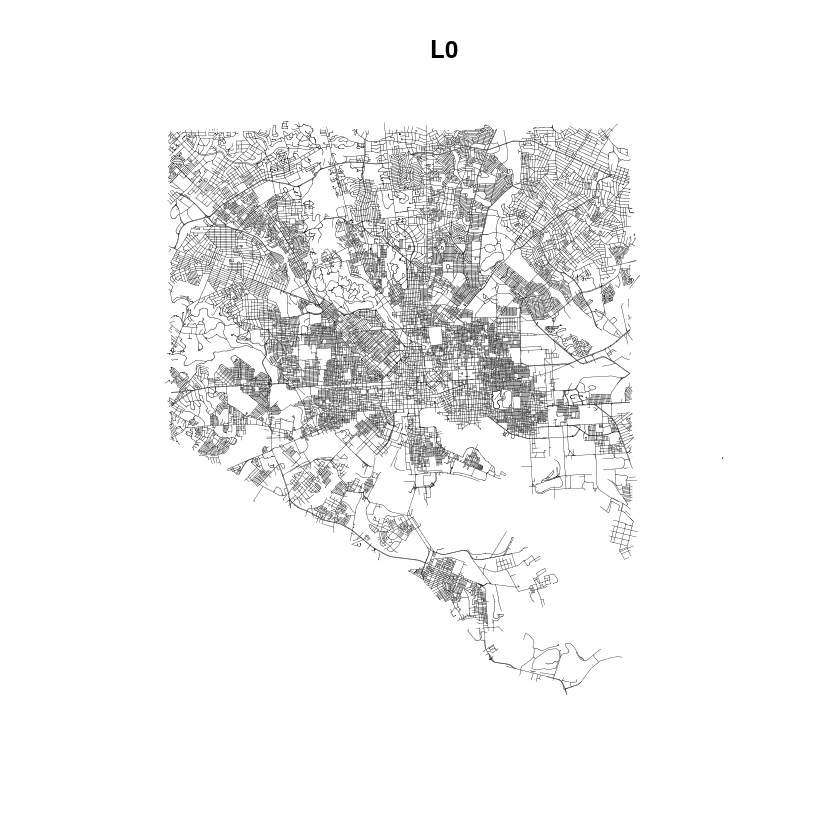

In [64]:
plot(L0, fill=TRUE, bg="skyblue", lwd=0.25, mar=rep(0,4), border=0 )